<a id='index'></a>

# Classifying Iris Species

#### Autor: Santiago González Montealegre

It covers the first chapter of the book _Introduction to Machine Learning_, section _A First Application: Classifying Iris Species_.

This ML problem consists of a **Classification Problem** using **Supervised Learning**.

## Índice

1. [Meet the Data](#meet-data)
1. [Measuring success](#measure-success)
    - [Training and test sets](#train-test-sets)
1. [First Things First](#first-data)
    - [Pair and Scatter Plot](#scatter-matrix)
1. [Building Your First Model](#first-model)
    - [Fit](#fit)
1. [Making Predictions](#predictions)
    - [Predict](#predict)
1. [Evaluating the Model](#eval-model)
    - [Score](#score)

## Summary

Un resumen de la estructura general de supervised ML problems:

1. Importing
1. Fit
1. Predict
1. Score

Importamos las librerías que usaremos

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
#import IPython
import scipy as sp
import sklearn as sk

Importamos también los datos que usaremos. En este caso, son datos _dummy_ que vienen por defecto en la librería `sklearn`.

<a id='meet-data'></a>

[Índice](#index)

## Meet the Data

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

El paquete de datos que importamos viene en un `Bunch` (similar a un diccionario), donde cada llave posee distintos elementos.


En la llave o propiedad `DESCR` encontramos una corta descripción del conjunto de datos. Basicamente encontramos el número de filas **_samples_**, el número de atributos **_features_**, cada posible _feature_ y los posibles outputs **_classes_**.

In [3]:
print(iris_dataset.DESCR[:500])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                



Además, unas estadísticas descriptivas de cada una de las características _(features)_.

In [4]:
print(iris_dataset.DESCR[500:1000])

    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========


En la llave `target_names` se retorna un array con las _classes_, o outputs posibles. Observamos que es un _three-class classification problem_

In [5]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Como estamos trabajando un problema de supervised learning debemos saber cual es el label al cual pertenecen cada una de las muestras de las cuales ya tenemos información.

Esta información se encuentra en la llave `target`, la cual retorna un array con la información relacionada a los `target_names`.

Por obvias razones, la longitud del array será igual al número de muestras.

In [6]:
iris_dataset.target, iris_dataset.target.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), (150,))

En la llave `data` encontramos un array, en este encontramos los datos que entrenarán nuestro modelo.

Como observamos anteriormente en _DESCR_ tenemos un dataset de 150 filas por 4 columnas, comprobamos esto analizando la propiedad `data`.

In [7]:
data = iris_dataset.data
data[:6], data.shape

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4]]), (150, 4))

En la llave `feature_names` encontramos una lista con los atributos o features del dataset.

In [8]:
iris_dataset.feature_names, type(iris_dataset.feature_names)

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 list)

<a id='measure-success'></a>

[Índice](#index)

## Measuring success
### Training and testing data

Una parte de los datos será usada para construir el modelo de machine learning, es llamada __training data__ o _training set_.

La parte restante de los datos será usada para evaluar que tan bien funciona el modelo, es llamada **test data**, _test set_ o _hold-out set_.

Una _regla del pulgar_ es usar un 75% para el training data.


Es importante que el training data sea tomado aleatoriamente, ya que como vimos en la llave `target` los labels de las muestras se encuentran ordenados, por lo tanto, si tomamos el 75% de la primera parte del array, estariamos dejando de lado la tercera clase (_virginica_).

Importamos la función que permite realizar la partición de los datos

In [9]:
from sklearn.model_selection import train_test_split

La función recibe los arrays con los datos. Obviamente necesitamos los datos y los target/label de cada muestra.

Adicionalmente, se le pueden pasar de forma opcional datos como:
- `train_size`, 0.25 por defecto
- `test_size`, 0.75 por defecto
- `random_state` que sirve para la semilla a usar para volver deterministico el output, es decir, si corremos varias veces el código aunque sea algo aleatorio obtendremos el mismo resultado.
- `shuffle` indica si se mezclaran los datos o no, `True` por defecto.
- `stratify`

<a id='train-test-sets'></a>

[Índice](#index)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data,
                                                    iris_dataset.target,
                                                    random_state=0)
print(f'Training set, data and target {X_train.shape}, {y_train.shape} \nTest set, data and target {X_test.shape}, {y_test.shape}')

Training set, data and target (112, 4), (112,) 
Test set, data and target (38, 4), (38,)


<a id='first-data'></a>

[Índice](#index)

## First Things First
### Look at your data

Antes de construir el modelo de machine learning es buena idea inspeccionar los datos para ver si puede ser resuelto sin necesidad del modelo o para hallar peculiaridades o anormalidades.

Una buena manera es visualizando los datos. Como tenemos más de 3 atributos es útil usar un _pair plot_ junto a un diagrama de dispersión _scatter plot_ para cada pareja.

Primero crearemos un DataFrame de Pandas donde guardaremos el training set, esto ya que realizaremos el pair plot por medio de pandas

In [11]:
iris_df = pd.DataFrame(X_train,
                       columns=iris_dataset.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


In [12]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

Creamos el gráfico
1. El Dataframe
1. `c=` se utiliza para que dependiendo del valor se coloque un color, como `y_train` $ \in \{0, 1, 2\} $ habrán 3 colores. Recibe un Array o List.
1. El tamaño de la figura
1. `marker` determina el tipo de figura para representar cada punto (x,y), lo común es un punto pero puede ser un triangulo. [Otros markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
1. `hist_kwds={'bins': x}` se utiliza para informar el número de niveles en los histogramas
1. `s=` determina el tamaño del _marker_ (punto), float o array
1. `alpha=` determina el nivel de transparencia de los puntos


<a id='scatter-matrix'></a>

[Índice](#index)

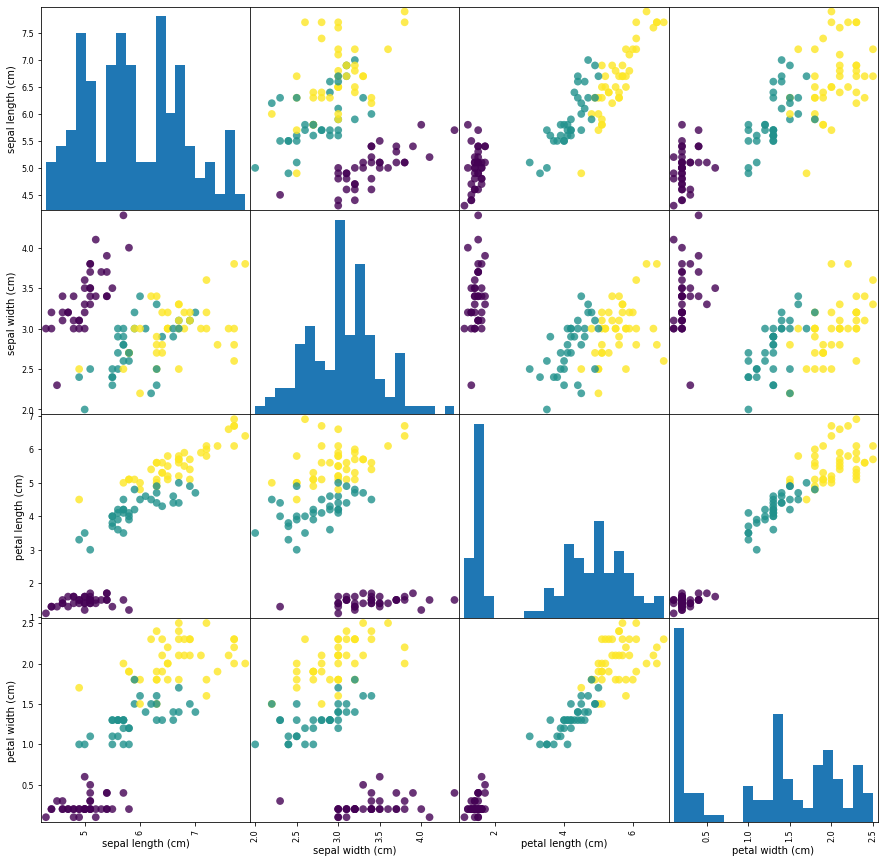

In [14]:
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

grr = pd.plotting.scatter_matrix(iris_df,
                                 c=y_train,
                                 figsize=(15,15),
                                 marker='o',
                                 hist_kwds={'bins': 20},
                                 s=60,
                                 alpha=0.8)

Para practicar este gráfico realizamos algunas modificaciones:

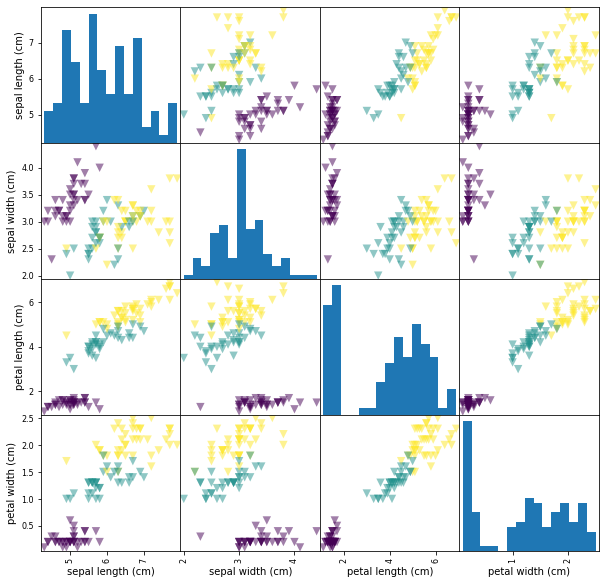

In [15]:
grr = pd.plotting.scatter_matrix(iris_df,
                                 c=y_train,
                                 figsize=(10,10),
                                 marker='v',
                                 hist_kwds={'bins': 15},
                                 s=70,
                                 alpha=0.5)

De los gráficos podemos ver que las 3 clases se separan relativamente bien entre las mediciones de sepal y petal. Por lo que un modelo de machine learning podría ser capaz de aprender a separarlos.

<a id='first-model'></a>

[Índice](#index)

## Building Your First Model
### k-Nearest Neighbors

Sabemos que es un problema de clasificación, por lo que usaremos uno de los tantos algoritmos de `sklearn` para estos problemas.

Usaremos el clasificador _k-nearest neighbors_, el cual para realizar una predicción para nuevas muestras encuentra el punto en el training set que es mas cercano al nuevo punto, luego asigna el label del training point al nuevo punto.

La _k_ en el nombre hace referencia a que en lugar de usar solo el punto más cercano, podemos considerar _k_ puntos más cercanos en el training set para después hacer la predicción usando la clase que más se repite entre estos k vecinos.

<a id='fit'></a>

[Índice](#index)

Primero importamos el modulo referente a este clasificador:

In [16]:
from sklearn.neighbors import KNeighborsClassifier

Creamos un objeto para poder usar el modelo.

Para este ejercicio usaremos un solo vecino.

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

Para construir el modelo en el training set usamos el método `fit` que tiene como argumentos los arrays `X_train` y `y_train`.

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

<a id='predictions'></a>

[Índice](#index)

## Making Predictions



Primero creamos un dato de prueba, es necesario que sea un numpy array que sea de dos dimensiones, ya que sklearn siempre espera 2d arrays.

Comprobamos que lo hayamos creado bien con la función `shape` ya que el número de elementos de la tupla debe ser dos, además, el segundo elemento (`.shape[1]`) debe ser igual al número de features.

<a id='predict'></a>

[Índice](#index)

In [19]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape, X_new.shape[1]==len(iris_dataset.feature_names)

((1, 4), True)

Para hacer una predicción usamos el método `predict` del objeto:

In [20]:
prediction = knn.predict(X_new)
prediction

array([0])

Como recordaremos los targets eran solo números $\in \{0, 1, 2\}$ por lo que para entender mejor este retorno, llamamos a `target_names` para poder retornar el string correspondiente.

In [21]:
prediction_str = iris_dataset.target_names[prediction]
print(f'{iris_dataset.target_names}\n{prediction_str}\n{prediction_str[0]}')

['setosa' 'versicolor' 'virginica']
['setosa']
setosa


<a id='eval-model'></a>

[Índice](#index)

## Evaluating the Model

Para evaluar el modelo haremos uso del test set que calculamos anteriormente.

In [22]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

Para evaluar el puntaje o el porcentaje de acierto de nuestro modelo de ML tenemos dos opciones:
- Manualmente: calcular un array de booleans donde comparamos la predicción del modelo con el valor que ya sabemos, posteriormente, calcular la media de dicho array que al estar compuesto por 1's y 0's será igual al porcentaje de acierto.
- `Score` function

In [23]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [24]:
score_np = round(np.mean(y_pred == y_test), 2)
score_np

0.97

<a id='score'></a>

[Índice](#index)

In [25]:
score_knn = round(knn.score(X_test, y_test), 2)
score_knn

0.97